#### Quick Introduction

The purpose of this notebook is to provide a very simplistic example of Multivariate Time Series Forecasting using Python

In [13]:
# Load libraries
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load data
df = pd.read_csv("../Data/Appliances Energy Usage Prediction/energydata_complete.csv")
df.head()

# Convert date column in the appropriate format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [14]:
# Define the features and target variables
target = ["Appliances"]
features = ["lights", "T1", "T2", "T3"]

# Obtain the master dataset
master_df = df[["date"] + target + features]
master_df.head()

,date,Appliances,lights,T1,T2,T3
0,2016-01-11 17:00:00,60,30,19.89,19.2,19.79
1,2016-01-11 17:10:00,60,30,19.89,19.2,19.79
2,2016-01-11 17:20:00,50,30,19.89,19.2,19.79
3,2016-01-11 17:30:00,50,40,19.89,19.2,19.79
4,2016-01-11 17:40:00,60,40,19.89,19.2,19.79


In [15]:
# Compute the lags of each and every variable
newFeatures = []
num_lags = int(6)
for i in target + features:
    for k in range(1,num_lags+1):
        # Create lags
        master_df["{}_{}".format(str(i), str(k))] = master_df[i].shift(k)
        newFeatures.append("{}_{}".format(str(i), str(k)))
master_df.head()

C:\Users\komammas.EUROPE\AppData\Local\Continuum\anaconda3\envs\cnntimeseries\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,date,Appliances,lights,T1,T2,T3,Appliances_1,Appliances_2,Appliances_3,Appliances_4,...,T2_3,T2_4,T2_5,T2_6,T3_1,T3_2,T3_3,T3_4,T3_5,T3_6
0,2016-01-11 17:00:00,60,30,19.89,19.2,19.79,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-11 17:10:00,60,30,19.89,19.2,19.79,60.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,19.79,NaN,NaN,NaN,NaN,NaN
2,2016-01-11 17:20:00,50,30,19.89,19.2,19.79,60.0,60.0,NaN,NaN,...,NaN,NaN,NaN,NaN,19.79,19.79,NaN,NaN,NaN,NaN
3,2016-01-11 17:30:00,50,40,19.89,19.2,19.79,50.0,60.0,60.0,NaN,...,19.2,NaN,NaN,NaN,19.79,19.79,19.79,NaN,NaN,NaN
4,2016-01-11 17:40:00,60,40,19.89,19.2,19.79,50.0,50.0,60.0,60.0,...,19.2,19.2,NaN,NaN,19.79,19.79,19.79,19.79,NaN,NaN


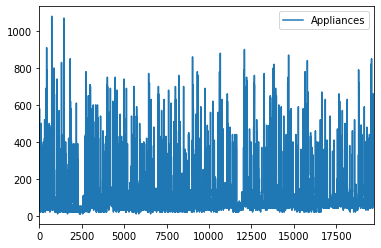

In [16]:
df[target].plot()

In [17]:
master_df[["date","Appliances","Appliances_1","Appliances_2"]].head()

,date,Appliances,Appliances_1,Appliances_2
0,2016-01-11 17:00:00,60,NaN,NaN
1,2016-01-11 17:10:00,60,60.0,NaN
2,2016-01-11 17:20:00,50,60.0,60.0
3,2016-01-11 17:30:00,50,50.0,60.0
4,2016-01-11 17:40:00,60,50.0,50.0


In [18]:
# Drop Missing Values
master_df = master_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
master_df.head()

,date,Appliances,lights,T1,T2,T3,Appliances_1,Appliances_2,Appliances_3,Appliances_4,...,T2_3,T2_4,T2_5,T2_6,T3_1,T3_2,T3_3,T3_4,T3_5,T3_6
6,2016-01-11 18:00:00,60,50,19.890000,19.200000,19.79,50.0,60.0,50.0,50.0,...,19.2,19.2,19.2,19.2,19.79,19.79,19.79,19.79,19.79,19.79
7,2016-01-11 18:10:00,60,50,19.856667,19.200000,19.73,60.0,50.0,60.0,50.0,...,19.2,19.2,19.2,19.2,19.79,19.79,19.79,19.79,19.79,19.79
8,2016-01-11 18:20:00,60,40,19.790000,19.200000,19.73,60.0,60.0,50.0,60.0,...,19.2,19.2,19.2,19.2,19.73,19.79,19.79,19.79,19.79,19.79
9,2016-01-11 18:30:00,70,40,19.856667,19.230000,19.79,60.0,60.0,60.0,50.0,...,19.2,19.2,19.2,19.2,19.73,19.73,19.79,19.79,19.79,19.79
10,2016-01-11 18:40:00,230,70,19.926667,19.356667,19.79,70.0,60.0,60.0,60.0,...,19.2,19.2,19.2,19.2,19.79,19.73,19.73,19.79,19.79,19.79


In [19]:
# Split our dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(master_df[newFeatures], master_df[target], test_size=0.3, random_state=0)

In [20]:
X_train.shape

(13810, 30)

In [21]:
y_test.shape

(5919, 1)

In [22]:
# Train a regression model
reg = LinearRegression().fit(X_train, y_train)
preds = reg.predict(X_train)

# Measure the model performance on the train set
mean_absolute_error(y_train, preds)

29.51437063393425